# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
# My turn:
# Check the rest of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [6]:
# Need more data to work with

b_calls = int(sum(data[data.race=='b'].call))
w_calls = int(sum(data[data.race=='w'].call))
b_total = sum(data['race'] == 'b')
w_total = sum(data['race'] == 'w')

print('Callbacks for black sounding names',b_calls)
print('Callbacks for white sounding names',w_calls)
print('Total black sounding names',b_total)
print('Total white sounding names',w_total)

Callbacks for black sounding names 157
Callbacks for white sounding names 235
Total black sounding names 2435
Total white sounding names 2435


In [7]:
# Good split between total names, but how much difference between callbacks?

b_call_pct = (b_calls*100/b_total)
w_call_pct = (w_calls*100/w_total)
print('Percent callbacks for black sounding names',b_call_pct)
print('Percent callbacks for white sounding names',w_call_pct)

Percent callbacks for black sounding names 6.4476386037
Percent callbacks for white sounding names 9.65092402464


In [8]:
# A little over 3%.  Is that significant?

print('Difference in callback percent',(w_call_pct - b_call_pct))

Difference in callback percent 3.20328542094


1) An A/B test seems most appropriate.  Since the values of the test will be simulated, a roughly normal distribution should occur, so the CLT is applicable.

2) The null hypothesis is there is no difference between callback percent for a black sounding name and a white sounding name.  The alternate hypothesis is there is a difference.

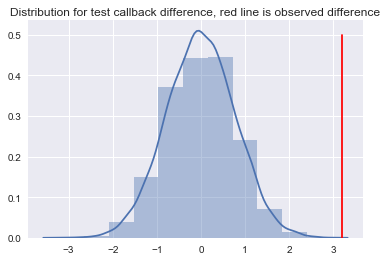

In [9]:
# Do the A/B test.  For this test, we assume the probability of a callback for a black sounding name and a white sounding name
# are the same.  I will run permutations on the call column while assuming the first half of the callbacks are to black sounding
# names and the second half are to white sounding names.

from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt

test_call = np.empty(len(data))
test_results = np.empty(10000)

for i in range(10000):
    test_call = np.random.permutation(data['call'])
    test_call_b = sum(test_call[:b_total])
    test_call_w = sum(test_call[(b_total+1):])
    test_results[i] = (test_call_w * 100 / w_total) - (test_call_b * 100 / b_total)
    
sns.set(color_codes=True)
sns.distplot(test_results,bins=int(np.sqrt(130)))
plt.plot([(w_call_pct - b_call_pct),(w_call_pct - b_call_pct)],[0,0.5],color='red')
plt.title('Distribution for test callback difference, red line is observed difference')
plt.show()

In [10]:
test_p_val = sum(test_results >= (w_call_pct - b_call_pct)) / 10000
print('p-value is',test_p_val)

p-value is 0.0


3) The p-value is very small.  The result is to reject the null hypothesis that there is no difference between the callback percentage for a black sounding name and a white sounding name.

4) Based on the simulated data, there is evidence of statistical significance for the difference between a callback for a black sounding name and a white sounding name.  In almost none of the simulated results was the difference in callback percent more than the observed difference.  Therefore, the original research is likely correct that there is possible racial discrimination in the labor market.  It would be appropriate to pursue further research with perhaps targetted employers, specific regions or cities, and specific industries to provide more details.

5) This analysis does not suggest that race/name is the most important factor for generating callbacks.  The analysis would have to be conducted again with each category tested, or at least each category suspected of discrimination, such as gender and years of experience, as a proxy for age.